Let a multi-armed bandit with:


*   2 arms
*   context $x \in \mathbb{R}^2$
*   predictions using Linear Regression
*   reward function $+1$/$+0.5$ depending on the zone + noise



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import scipy.stats as stats
import pandas as pd
from scipy.special import expit
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from abc import ABC, abstractmethod 

In [0]:
class Bandit(ABC):
  def __init__(self, epsilon=0.01):
    self.history = []
    self.k = 2
    self.epsilon = epsilon

  def generate_context(self):
    return np.random.random(2)

  def choose_arm(self, x):
    prediction = np.zeros(self.k)
    df = pd.DataFrame(self.history, columns=['x', 'k', 'reward'])

    if (df.groupby(['k']).size().shape[0] == 2) or ():
      for i in range(self.k):
        data = df[df['k'] == i]
        X = data['x']
        y = data['reward']

        #lr = LinearRegression()
        lr = DecisionTreeRegressor()
        lr = lr.fit(np.concatenate(X.values).reshape(-1, 2), y)
        prediction[i] = lr.predict(x.reshape(-1, 2))

      best_bandit = np.argmax(prediction)
    
    else:
      best_bandit = np.random.randint(self.k)

    rand_num = np.random.random()
    
    if self.epsilon > rand_num:
        return np.random.randint(self.k)
    else:
        return best_bandit

  def get_reward(self, x, action):
    zone = self.boundaries(x)
    rk = 0.5 * int(action == zone) + 0.5

    noise = 0.2 * stats.norm.rvs()
    rk += noise
    return rk

  def update_values(self, x, action, reward):
    update = {}
    update['x'] = x
    update['k'] = action
    update['reward'] = reward
    self.history.append(update)

  def plot(self):
    x = np.random.random((2, 10000))
    y = self.boundaries(x)
    df = pd.DataFrame([x[0], x[1], y]).T
    df.columns = ['x0', 'x1', 'y']

    plt.scatter(df[df['y'] == 0]['x0'], df[df['y'] == 0]['x1'], color='blue', label='arm 0')
    plt.scatter(df[df['y'] == 1]['x0'], df[df['y'] == 1]['x1'], color='red', label='arm 1')
    plt.legend()

  @abstractmethod
  def boundaries(self, x):
    pass

In [0]:
class Zones(Bandit):
  def boundaries(self, x):
    return np.logical_or(x[0] > 0.6, x[1] > 0.8).astype(int)

In [0]:
cmab = Zones()

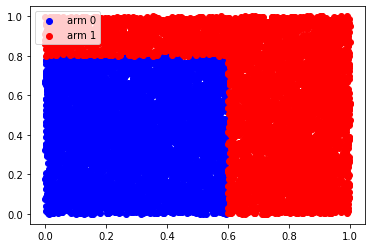

In [390]:
cmab.plot()

In [0]:
n_iter = 1000

for it in range(n_iter):
  x = cmab.generate_context()
  action = cmab.choose_arm(x)
  reward = cmab.get_reward(x, action)
  cmab.update_values(x, action, reward)

data = pd.DataFrame(cmab.history)

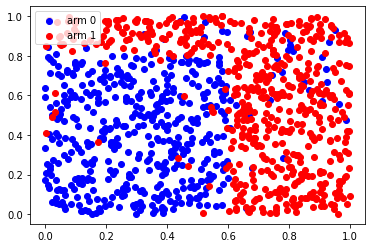

In [392]:
plt.scatter(np.concatenate(data[data['k']==0]['x'].values).reshape(-1, 2)[:,0], np.concatenate(data[data['k']==0]['x'].values).reshape(-1, 2)[:,1], color='blue', label='arm 0')
plt.scatter(np.concatenate(data[data['k']==1]['x'].values).reshape(-1, 2)[:,0], np.concatenate(data[data['k']==1]['x'].values).reshape(-1, 2)[:,1], color='red', label='arm 1');
plt.legend();